<a href="https://colab.research.google.com/github/mmostafahareb/credential_finder/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports:

In [7]:
import os
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


Data Extracting and Labeling

In [3]:
zip_path = "projects.zip"
extract_dir = "Projects"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(".")


clean_dir = os.path.join(extract_dir, 'Clean')
dirty_dir = os.path.join(extract_dir, 'Dirty')

file_paths = []
labels = []

# Get all file paths and labels for clean files
for filename in os.listdir(clean_dir):
    file_paths.append(os.path.join(clean_dir, filename))
    labels.append('clean')

# Get all file paths and labels for dirty files
for filename in os.listdir(dirty_dir):
    file_paths.append(os.path.join(dirty_dir, filename))
    labels.append('dirty')

# Now you have a list of file paths and corresponding labels
print(file_paths)
print(labels)

['Projects/Clean/main2.js', 'Projects/Clean/detect_make.py', 'Projects/Clean/Styled.tsx', 'Projects/Clean/index-1 (3).js', 'Projects/Clean/views.py', 'Projects/Clean/insertion_sort.py', 'Projects/Clean/acronym_generator.py', 'Projects/Clean/ClientHandler.java', 'Projects/Clean/Text_layout.js', 'Projects/Clean/Templatable.js', 'Projects/Clean/parse_pom.js', 'Projects/Clean/TaskRunner.js', 'Projects/Clean/indexing.py', 'Projects/Clean/euclid_gcd.py', 'Projects/Clean/SimilarityVSM.py', 'Projects/Clean/audio.py', 'Projects/Clean/Tablet.js', 'Projects/Clean/ToolbarDroppable.js', 'Projects/Clean/gui (2).py', 'Projects/Clean/InvertBinaryTree.java', 'Projects/Clean/stream.py', 'Projects/Clean/processing.py', 'Projects/Clean/admin.js', 'Projects/Clean/BinarySearch.java', 'Projects/Clean/TextArea_layout.js', 'Projects/Clean/test.py', 'Projects/Clean/products.js', 'Projects/Clean/mergeIntervals.js', 'Projects/Clean/AStarAlgorithm.java', 'Projects/Clean/HighestPowerOf2.java', 'Projects/Clean/array

Data Preprocessing:

In [4]:
file_contents = []
for file_path in file_paths:
    with open(file_path, 'r',errors='ignore') as file:
        file_contents.append(file.read())

X_train, X_test, y_train, y_test = train_test_split(file_contents, labels, test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train).toarray()
X_test_vectorized = vectorizer.transform(X_test).toarray()
print(X_train_vectorized.shape)
print(X_test_vectorized.shape)
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)


(364, 14508)
(92, 14508)




LTSM Model Building:



In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

max_words = 10000  # Maximum size of the vocabulary
embedding_dim = 128  # Embedding size for each word
max_len = 14508  # Maximum length of an input sequence

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(512, return_sequences=True))
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(256, activation='gelu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='gelu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='gelu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_vectorized, y_train_encoded, batch_size=65, epochs=25, validation_data=(X_test_vectorized, y_test_encoded))





Epoch 1/25
6/6 [==============================] - 21s 2s/step - loss: 0.6215 - accuracy: 0.7143 - val_loss: 0.6085 - val_accuracy: 0.7174
Epoch 2/25
6/6 [==============================] - 12s 2s/step - loss: 0.5729 - accuracy: 0.7802 - val_loss: 0.6003 - val_accuracy: 0.7174
Epoch 3/25
6/6 [==============================] - 12s 2s/step - loss: 0.5390 - accuracy: 0.7802 - val_loss: 0.6029 - val_accuracy: 0.7174
Epoch 4/25
6/6 [==============================] - 12s 2s/step - loss: 0.5512 - accuracy: 0.7775 - val_loss: 0.6014 - val_accuracy: 0.7174
Epoch 5/25
6/6 [==============================] - 12s 2s/step - loss: 0.5547 - accuracy: 0.7802 - val_loss: 0.6006 - val_accuracy: 0.7174
Epoch 6/25
6/6 [==============================] - 12s 2s/step - loss: 0.5439 - accuracy: 0.7775 - val_loss: 0.5994 - val_accuracy: 0.7174
Epoch 7/25
6/6 [==============================] - 12s 2s/step - loss: 0.5390 - accuracy: 0.7802 - val_loss: 0.6089 - val_accuracy: 0.7174
Epoch 8/25
6/6 [==================

Model Evaluation and Saving:


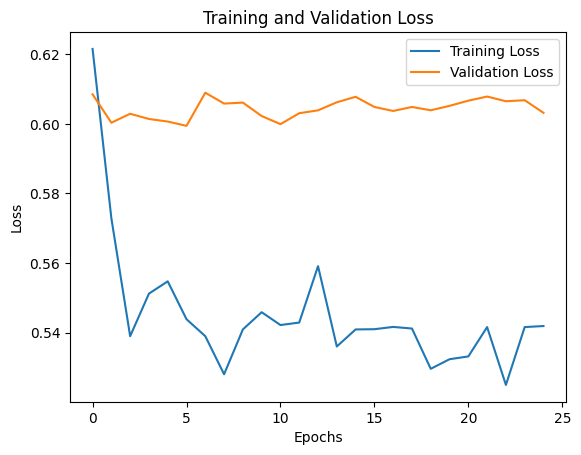

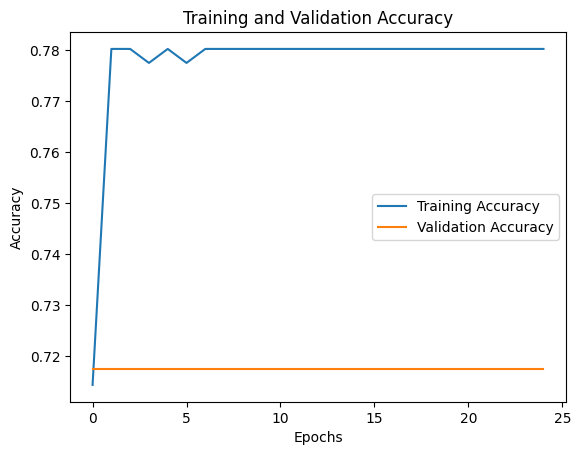

3/3 [==============================] - 2s 740ms/step - loss: 0.6032 - accuracy: 0.7174
Loss:  0.6031553149223328
Accuracy:  0.717391312122345
Saved model to disk


In [10]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test_vectorized, y_test_encoded)

print("Loss: ", loss)
print("Accuracy: ", accuracy)
# Save the model
model.save("lstm_model.h5")

print("Saved model to disk")